In [41]:
import pandas as pd
from scipy.stats import norm
import numpy as np
from datetime import date

In [42]:
data = pd.read_csv('2weeks.csv', sep=';')

In [43]:
data.head()

,Symbol,Position,Type,Lots,Open time,Open price,Close time,Close price,Profit,Net profit,Rollover,S/L,T/P,Commission,Swap,Margin
0,GBPUSD,975614577,Buy,0.01,26.05.2023 13:03:10,1.23405,29.05.2023 19:41:44,1.23550,1.45,1.21,0,1.23203,1.23787,0,-0.24,6.17
1,US30,976579425,Buy,0.01,29.05.2023 13:58:01,33194.00000,29.05.2023 19:21:06,33217.00000,1.15,0.73,0,33154.00000,33254.00000,0,-0.42,8.30
2,USDJPY,976495346,Buy,0.02,29.05.2023 11:15:35,140.24700,29.05.2023 17:03:19,140.41400,2.38,2.38,0,140.10000,140.47500,0,0.00,10.00
3,GBPUSD,975614577,Buy,0.01,26.05.2023 13:03:10,1.23405,29.05.2023 14:40:24,1.23593,1.88,1.70,0,1.23203,1.23787,0,-0.18,6.17
4,OIL.WTI,976493247,Buy,0.01,29.05.2023 11:12:47,72.48000,29.05.2023 14:38:52,72.86000,3.80,3.80,0,71.98000,73.29000,0,0.00,10.87


In [44]:
data.dtypes

Symbol          object
Position         int64
Type            object
Lots           float64
Open time       object
Open price     float64
Close time      object
Close price    float64
Profit         float64
Net profit     float64
Rollover         int64
S/L            float64
T/P            float64
Commission       int64
Swap           float64
Margin         float64
dtype: object

## Transformando Open time e Close time em datetime

In [45]:
data['Open time'] = pd.to_datetime(data['Open time'])
data['Close time'] = pd.to_datetime(data['Close time'])

In [46]:
data.dtypes

Symbol                 object
Position                int64
Type                   object
Lots                  float64
Open time      datetime64[ns]
Open price            float64
Close time     datetime64[ns]
Close price           float64
Profit                float64
Net profit            float64
Rollover                int64
S/L                   float64
T/P                   float64
Commission              int64
Swap                  float64
Margin                float64
dtype: object

**Gerando a variável Tipo com base em Compra ou Venda**

In [47]:
data['Tipo'] = data['Type'].apply(lambda x: 'Compra' if x in 'Buy Stop' else 'Venda')
data.head()

,Symbol,Position,Type,Lots,Open time,Open price,Close time,Close price,Profit,Net profit,Rollover,S/L,T/P,Commission,Swap,Margin,Tipo
0,GBPUSD,975614577,Buy,0.01,2023-05-26 13:03:10,1.23405,2023-05-29 19:41:44,1.23550,1.45,1.21,0,1.23203,1.23787,0,-0.24,6.17,Compra
1,US30,976579425,Buy,0.01,2023-05-29 13:58:01,33194.00000,2023-05-29 19:21:06,33217.00000,1.15,0.73,0,33154.00000,33254.00000,0,-0.42,8.30,Compra
2,USDJPY,976495346,Buy,0.02,2023-05-29 11:15:35,140.24700,2023-05-29 17:03:19,140.41400,2.38,2.38,0,140.10000,140.47500,0,0.00,10.00,Compra
3,GBPUSD,975614577,Buy,0.01,2023-05-26 13:03:10,1.23405,2023-05-29 14:40:24,1.23593,1.88,1.70,0,1.23203,1.23787,0,-0.18,6.17,Compra
4,OIL.WTI,976493247,Buy,0.01,2023-05-29 11:12:47,72.48000,2023-05-29 14:38:52,72.86000,3.80,3.80,0,71.98000,73.29000,0,0.00,10.87,Compra


**Tirando a diferença de tempo entre compra e venda**

In [48]:
data['Tempo Op.'] = data['Close time'] - data['Open time']
data.head()

,Symbol,Position,Type,Lots,Open time,Open price,Close time,Close price,Profit,Net profit,Rollover,S/L,T/P,Commission,Swap,Margin,Tipo,Tempo Op.
0,GBPUSD,975614577,Buy,0.01,2023-05-26 13:03:10,1.23405,2023-05-29 19:41:44,1.23550,1.45,1.21,0,1.23203,1.23787,0,-0.24,6.17,Compra,3 days 06:38:34
1,US30,976579425,Buy,0.01,2023-05-29 13:58:01,33194.00000,2023-05-29 19:21:06,33217.00000,1.15,0.73,0,33154.00000,33254.00000,0,-0.42,8.30,Compra,0 days 05:23:05
2,USDJPY,976495346,Buy,0.02,2023-05-29 11:15:35,140.24700,2023-05-29 17:03:19,140.41400,2.38,2.38,0,140.10000,140.47500,0,0.00,10.00,Compra,0 days 05:47:44
3,GBPUSD,975614577,Buy,0.01,2023-05-26 13:03:10,1.23405,2023-05-29 14:40:24,1.23593,1.88,1.70,0,1.23203,1.23787,0,-0.18,6.17,Compra,3 days 01:37:14
4,OIL.WTI,976493247,Buy,0.01,2023-05-29 11:12:47,72.48000,2023-05-29 14:38:52,72.86000,3.80,3.80,0,71.98000,73.29000,0,0.00,10.87,Compra,0 days 03:26:05


**Removendo algumas colunas**

In [49]:
data.drop(['Position',
           'Open price',
           'Open time',
           'Close price',
           'Close time',
           'Rollover',
           'Commission',
           'T/P',
           'S/L',
           'Type'],
          axis='columns', inplace=True)
data.head(10)

,Symbol,Lots,Profit,Net profit,Swap,Margin,Tipo,Tempo Op.
0,GBPUSD,0.01,1.45,1.21,-0.24,6.17,Compra,3 days 06:38:34
1,US30,0.01,1.15,0.73,-0.42,8.30,Compra,0 days 05:23:05
2,USDJPY,0.02,2.38,2.38,0.00,10.00,Compra,0 days 05:47:44
3,GBPUSD,0.01,1.88,1.70,-0.18,6.17,Compra,3 days 01:37:14
4,OIL.WTI,0.01,3.80,3.80,0.00,10.87,Compra,0 days 03:26:05
5,US30,0.01,1.65,1.65,0.00,8.30,Compra,0 days 04:19:31
6,USDJPY,0.02,-2.00,-2.00,0.00,10.00,Compra,0 days 01:13:10
7,US30,0.01,0.30,0.30,0.00,8.28,Venda,0 days 03:20:18
8,USDJPY,0.01,6.71,6.82,0.11,5.00,Compra,1 days 01:16:36
9,OIL.WTI,0.01,-2.40,-2.40,0.00,10.87,Venda,0 days 00:48:50


## Frequência de resultado de acordo com o tipo de ordem (Compra/Venda) por símbolo

In [50]:
freq_simbolo = pd.crosstab(data.Symbol, data.Tipo,
               values=data['Net profit'],
               aggfunc={'sum'})
freq_simbolo

sum      
Tipo    Compra Venda
Symbol              
EURUSD   -4.52  2.44
GBPUSD    2.91  2.81
OIL.WTI   8.10 -2.30
US30      2.43  2.65
USDJPY    7.20   NaN

## Obtendo o tempo máximo, mínimo e médio em operação

In [51]:
tempo_max = data['Tempo Op.'].max()
tempo_min = data['Tempo Op.'].min()
tempo_medio = data['Tempo Op.'].mean()
tempo_em_operacao = pd.DataFrame([tempo_max, tempo_min, tempo_medio],
                                  columns=['Tempo'],
                                  index=['Máximo', 'Mínimo', 'Médio'])
tempo_em_operacao


,Tempo
Máximo,3 days 06:38:34
Mínimo,0 days 00:03:18
Médio,0 days 13:41:08.851851851


## Reamostragem (1000 amostras com reposição de mesmo tamanho das obs)

<Axes: >

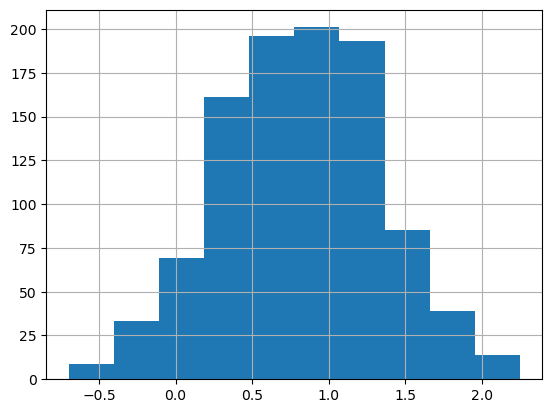

In [52]:
amostra = [data['Net profit'].sample(n=len(data),
           replace=True,
           ignore_index=True) for i in range(0, 1000)
          ]
amostra = pd.DataFrame(amostra).T
amostra.mean().hist()

In [53]:
ganho_maximo = amostra.sum().max()
perda_maxima = amostra.sum().min()
ganho_medio = amostra.sum().mean()
print(f'Ganho Amostral Máximo: R${ganho_maximo:.2f}',
      f'\nPerda Amostral Máxima: R${perda_maxima:.2f}',
      f'\nGanho Amostral Médio:  R${ganho_medio:.2f}')

Ganho Amostral Máximo: R$60.68 
Perda Amostral Máxima: R$-18.81 
Ganho Amostral Médio:  R$22.01


In [54]:
media = amostra['Net profit'].sum().mean()
desvio_padrao = amostra['Net profit'].sum().std()
z = norm.ppf(0.975)
e = z * desvio_padrao
n = (z * (desvio_padrao / e)) ** 2
n = int(n.round())
intervalo = norm.interval(alpha = 0.95,
                          loc = media,
                          scale = desvio_padrao / np.sqrt(n))

C:\Users\dduca\AppData\Local\Temp\ipykernel_3236\1292304377.py:7: DeprecationWarning: Use of keyword argument 'alpha' for method 'interval' is deprecated and wil be removed in SciPy 1.11.0. Use first positional argument or keyword argument 'confidence' instead.
  intervalo = norm.interval(alpha = 0.95,


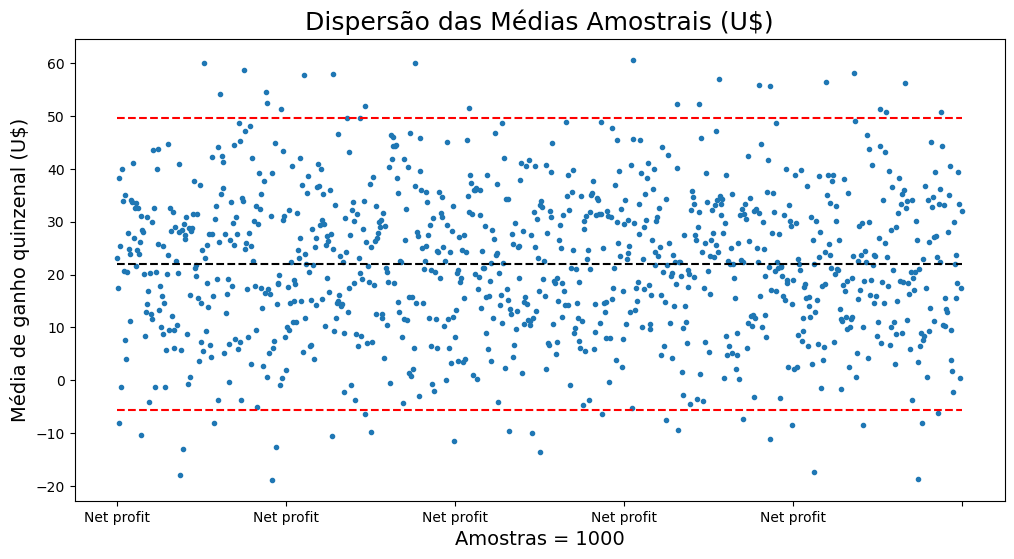

In [55]:
ax = amostra.sum().plot(style = '.')
ax.figure.set_size_inches(12, 6)
ax.set_title('Dispersão das Médias Amostrais (U$)', fontsize=18)
ax.set_ylabel('Média de ganho quinzenal (U$)', fontsize=14)
ax.set_xlabel('Amostras = 1000', fontsize=14)
ax.hlines(y = media, xmin = 0, xmax = 1000, colors='black', linestyles='dashed')
ax.hlines(y = intervalo[0], xmin = 0, xmax = 1000, colors='red', linestyles='dashed')
ax.hlines(y = intervalo[1], xmin = 0, xmax = 1000, colors='red', linestyles='dashed')
ax=ax